# **Introduction**

In this programming assignment, you will be practicing implementing dynamic programming solutions. As usual, in some code problems you just need to implement an algorithm covered in the lectures, while for some others your goal will be to first design an algorithm and then implement it.

## Money Change Again

Problem Description

As we already know, a natural greedy strategy for the change problem does not work correctly for any set of
denominations. For example, if the available denominations are 1, 3, and 4, the greedy algorithm will change
6 cents using three coins (4 + 1 + 1) while it can be changed using just two coins (3 + 3). Your goal now is
to apply dynamic programming for solving the Money Change Problem for denominations 1, 3, and 4.

**Input Format.** Integer money.

**Constraints.** 1 ≤ money ≤ $10^3$.

**Output Format.** The minimum number of coins with denominations 1, 3, 4 that changes money.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`2`

Output:

`2`

$2 = 1 + 1.$

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 2.}$

Input:

`34`

Output:

`9`

$34 = 3 + 3 + 4 + 4 + 4 + 4 + 4 + 4 + 4.$

In [1]:
# Direct Solution

# Python3

import math
import sys
import time

money = int(input())
den = [1, 3, 4]
minCoins = [0] + [math.inf]*money


for i in range(1, money+1):
    for j in den:
        if i>=j:
            coins = minCoins[i-j]+1
            if coins < minCoins[i]:
                minCoins[i] = coins

start_time = time.time()
print(minCoins[money])
print("--- %s seconds ---" % (time.time() - start_time))

34
9
--- 0.0003490447998046875 seconds ---


## Primitive Calculator

Problem Description

**Task.** Given an integer 𝑛, compute the minimum number of operations needed to obtain the number 𝑛 starting from the number 1.

**Input Format.** The input consists of a single integer 1 ≤ 𝑛 ≤ $10^6$.

**Output Format.** In the first line, output the minimum number 𝑘 of operations needed to get 𝑛 from 1. In the second line output a sequence of intermediate numbers. That is, the second line should contain positive integers 𝑎0, 𝑎2, . . . , 𝑎𝑘−1 such that 𝑎0 = 1, 𝑎𝑘−1 = 𝑛 and for all 0 ≤ 𝑖 < 𝑘 − 1, 𝑎𝑖+1 is equal to either 𝑎𝑖 + 1, 2𝑎𝑖, or 3𝑎𝑖. If there are many such sequences, output any one of them.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`1`

Output:

`0`

`1`

$2 = 1 + 1.$

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 2.}$

Input:

`5`

Output:

`3`

`1 2 4 5`

Here, we first multiply 1 by 2 two times and then add 1. Another possibility is to first multiply by 3 and then add 1 two times. Hence “1 3 4 5” is also a valid output in this case.

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 3.}$

Input:

`96234`

Output:

`14`

`1 3 9 10 11 22 66 198 594 1782 5346 16038 16039 32078 96234`

Again, another valid output in this case is “1 3 9 10 11 33 99 297 891 2673 8019 16038 16039 48117 96234”.

In [2]:
# Direct Solution

# Python3

import math
import sys
import time

n = int(input())

# number of operations required for getting 0, 1, 2,.. , n

num_op = [0, 0] + [math.inf]*(n-1)

for i in range(2, n+1):
    temp1, temp2, temp3 = [math.inf]*3

    temp1 = num_op[i-1] + 1 
    if (i%2 == 0): temp2 = num_op[i//2] + 1
    if (i%3 == 0): temp3 = num_op[i//3] + 1
    min_ops = min(temp1, temp2, temp3)
    num_op[i] = min_ops

print(num_op[n])

# Backtracking the numbers leading to n

nums = [n]
while n!=1:
    if (n%3 ==0 and num_op[n]-1 == num_op[n//3]):
        nums += [n//3]
        n = n//3
    elif (n%2 ==0 and num_op[n]-1 == num_op[n//2]):
        nums += [n//2]
        n = n//2
    else:
        nums += [n-1]
        n = n - 1

start_time = time.time()
print(' '.join([str(i) for i in nums][::-1]))
print("--- %s seconds ---" % (time.time() - start_time))

96234
14
1 3 9 10 11 22 66 198 594 1782 5346 16038 16039 32078 96234
--- 0.00052642822265625 seconds ---


## Edit Distance

Problem Description

**Task.** The goal of this problem is to implement the algorithm for computing the edit distance between two strings.

**Input Format.** Each of the two lines of the input contains a string consisting of lower case latin letters

**Constraints** The length of both strings is at least 1 and at most 100.

**Output Format.** Output the edit distance between the given two strings.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`ab`

`ab`

Output:

`0`

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 2.}$

Input:

`short`

`ports`

Output:

`3`

An alignment of total cost 3.

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 3.}$

Input:

`editing`

`distance`

Output:

`5`

An alignment of total cost 5.

In [5]:
# Direct Solution

# Python3

import math
import sys
import time
import numpy

#hypercomplex, this is assembled from a wide variety of solutions.

def EditDistance(s1, s2):

    #Computes the edit distance of two strings (str, str) -> (int, 2D-array)

    ln_s1 = len(s1)
    ln_s2 = len(s2)

    # Initializing the matrix
    Matrix = numpy.zeros((ln_s1+1 , ln_s2+1))
    for i in range(ln_s2+1):
        Matrix[0][i] = i

    for i in range(ln_s1+1):
        Matrix[i][0] = i

    # Filling the matrix
    for i in range(1, ln_s1+1):
        for j in range(1, ln_s2+1):
            insertion = Matrix[i][j-1]   + 1
            deletion  = Matrix[i-1][j]   + 1
            mismatch  = Matrix[i-1][j-1] + 1
            match     = Matrix[i-1][j-1]
            if s1[i-1] == s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, match)
            if s1[i-1] != s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, mismatch)
    
    return (int(Matrix[ln_s1][ln_s2]), Matrix)

def OptimalAlignment(Matrix, s1, s2, top, bottom, i, j):
    
    #Finds the optimal alignment of two strings given the edit matrix (2D-array, str, str, str, str, int, int) -> (str, str)

    if i == 0 and j == 0:
        return (' '.join(top[::-1]), ' '.join(bottom[::-1]))

    if i>0 and Matrix[i][j] == Matrix[i-1][j] + 1:
        top.append(f'|{s1[i-1]}|')
        bottom.append('|-|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i-1, j)

    elif j>0 and Matrix[i][j] == Matrix[i][j-1] + 1:
        bottom.append(f'|{s2[j-1]}|')
        top.append('|-|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i, j-1)

    else:
        top.append(f'|{s1[i-1]}|')
        bottom.append(f'|{s2[j-1]}|')
        return OptimalAlignment(Matrix, s1, s2, top, bottom, i-1, j-1)

if __name__ == '__main__':
    s1, s2 = input(), input()
    start_time = time.time()
    edit_distance, Matrix = EditDistance(s1, s2)
    top, bottom = OptimalAlignment(Matrix, s1, s2, [], [], len(s1), len(s2))
    print(edit_distance)
    print("--- %s seconds ---" % (time.time() - start_time))

editing
distance
5
--- 0.0013806819915771484 seconds ---


## Longest Common Subsequence of Two Sequences

Problem Description

**Task.** Given two sequences 𝐴 = (𝑎1, 𝑎2, . . . , 𝑎𝑛) and 𝐵 = (𝑏1, 𝑏2, . . . , 𝑏𝑚), find the length of their longest common subsequence, i.e., the largest non-negative integer 𝑝 such that there exist indices 1 ≤ 𝑖1 <
𝑖2 < · · · < 𝑖𝑝 ≤ 𝑛 and 1 ≤ 𝑗1 < 𝑗2 < · · · < 𝑗𝑝 ≤ 𝑚, such that 𝑎𝑖1 = 𝑏𝑗1 , . . . , 𝑎𝑖𝑝 = 𝑏𝑗𝑝 .

**Input Format.** First line: 𝑛. Second line: 𝑎1, 𝑎2, . . . , 𝑎𝑛. Third line: 𝑚. Fourth line: 𝑏1, 𝑏2, . . . , 𝑏𝑚.

**Constraints.** 1 ≤ 𝑛,𝑚 ≤ 100; −$10^9$ < 𝑎𝑖, 𝑏𝑖 < $10^9$.

**Output Format.** Output 𝑝.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`3`

`2 7 5`

`2`

`2 5`

Output:

`2`

A common subsequence of length 2 is (2, 5).

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 2.}$

Input:

`1`

`7`

`4`

`1 2 3 4`

Output:

`0`

The two sequences do not share elements.

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 3.}$

Input:

`4`

`2 7 8 3`

`4`

`5 2 8 7`

Output:

`2`

One common subsequence is (2, 7). Another one is (2, 8).

In [8]:
# Direct Solution

# Python3

import math
import sys
import time
import numpy

def LCS2(s1, s2, n1, n2):

    #Based on previous example
    
    #Finds the length of the longest common subsequence of two strings(str, str, int, int) -> (int, 2D-array)

    # Initializing the matrix
    Matrix = numpy.zeros((n1+1 , n2+1))

    for i in range(1, n1+1):
        for j in range(1, n2+1):
            if s1[i-1] == s2[j-1]:
                Matrix[i][j] = Matrix[i-1][j-1] + 1
            if s1[i-1] != s2[j-1]:
                Matrix[i][j] = max(Matrix[i][j-1], Matrix[i-1][j])
    
    return (int(Matrix[n1][n2]), Matrix)

def printSubsequence(Matrix, s1, s2, i, j, seq):
    
    #Returns the longest common subsequence of two strings (2D-array, str, str, int, int, str) -> (str)

    if i == 0 or j == 0:
        if seq == []: return None
        return ''.join(seq[::-1])

        # If inputs for s1, s2 are numbers uncomment below line. 
        # return ' '.join([str(i) for i in seq][::-1])

    if s1[i-1] == s2[j-1]:
        seq.append(s1[i-1])
        return printSubsequence(Matrix, s1, s2, i-1, j-1, seq)
    
    if Matrix[i-1][j] > Matrix[i][j-1]: 
        return printSubsequence(Matrix, s1, s2, i-1, j, seq)
    else: 
        return printSubsequence(Matrix, s1, s2, i, j-1, seq)


if __name__ == '__main__':
    n1, s1, n2, s2 = int(input()), input(), int(input()), input()

    # If inputs for s1, s2 are numbers uncomment below line. 
    # s1, s2 = [int(i) for i in s1.split()], [int(i) for i in s2.split()]
    start_time = time.time()
    LCS_length, Matrix = LCS2(s1, s2, n1, n2)
    sequence = printSubsequence(Matrix, s1, s2, n1, n2, [])
    print(LCS_length)
    #print(int(int(LCS_length)/int(sequence)))
    print("--- %s seconds ---" % (time.time() - start_time))

4
2 7 8 4
4
5 2 7 8
Length of LCS: 2
  
--- 0.0003135204315185547 seconds ---


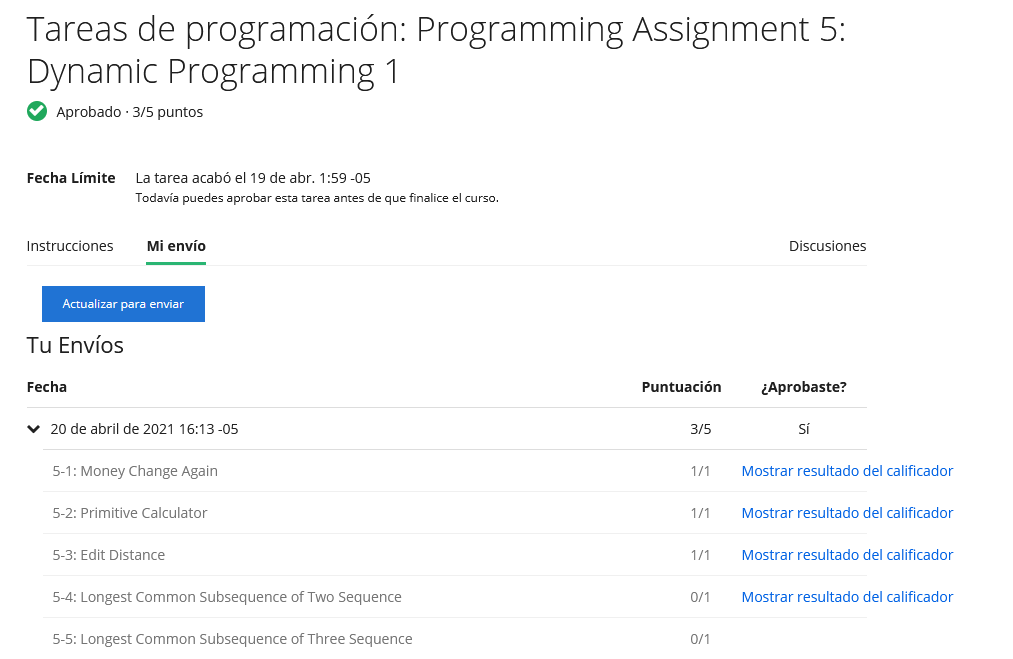